# Final Exam of Prepairing for modeling.
## Lecturers: Ho Nhut Minh
## Name: Tran Thanh Phuong
## Class: DT2210L


## Outline
Read the following files into Python:
●	Customer data: maven_music_customers.csv
●	Listing history: maven_music_listening_history.xlsx

1. Scope the Project
________________________________________
Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using the past three months of customer data which includes subscription and listening history.
________________________________________
keyboard_arrow_down
2. Gather Data
________________________________________
Read the following files into Python:
●	Customer data: maven_music_customers.csv
●	Listing history: maven_music_listening_history.xlsx

3. Clean Data
________________________________________

4. EDA
________________________________________
Try to better understand the customers who cancelled:
●	How long were they members before they cancelled?
●	What percentage of customers who cancelled had a discount vs customers who didn't cancel?

________________________________________
Better understand the customers' listening histories:
●	Join together the listening history and audio tables
●	How many listening sessions did each customer have in the past 3 months?
●	What were the most popular genres that customers listened to?

5. Prep for Modeling
________________________________________
Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
●	Customer ID
●	Whether a customer cancelled or not
●	Whether a customer received a discount or not
●	The number of listening sessions
●	Percent of listening history consisting of Pop
●	Percent of listening history consisting of Podcasts

________________________________________
Visualize the relationships in the modeling DataFrame using a pair plot:
●	What are some of your observations?
●	What variables might do a good job predicting customer cancellation?




---

---





---



---

# **START**

In [ ]:
# mount drive into google conlab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imort the library nessesary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scope the Project
#### Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using the past three months of customer data which includes subscription and listening history.

# 2. Gather Data
#### The dataset includes 2 files, one of them is in CSV format, and remain is in Excel format
#### ●	Customer data: maven_music_customers.csv
#### ●	Listing history: maven_music_listening_history.xlsx


In [ ]:
# Read the customer data
Customer_data = pd.read_csv('/content/drive/MyDrive/01. Exploratory Data Analysis/Data/maven_music_customers.csv')
print(f"Customer data shape: {Customer_data.shape}\n")
print(Customer_data.head())

Customer data shape: (30, 8)

   Customer ID   Customer Name                              Email  \
0         5001  Harmony Greene  Email: harmonious.vibes@email.com   
1         5002       Aria Keys    Email: melodious.aria@email.edu   
2         5004      Lyric Bell  Email: rhythmical.lyric@email.com   
3         5267    Rock Bassett       Email: groovy.rock@email.com   
4         5338    Rhythm Dixon   Email: beats.by.rhythm@email.edu   

  Member Since Subscription Plan Subscription Rate Discount? Cancellation Date  
0      3/13/23       Basic (Ads)            $2.99        NaN               NaN  
1      3/13/23               NaN            $2.99        NaN               NaN  
2      3/13/23               NaN            $2.99        NaN            6/1/23  
3      3/20/23       Basic (Ads)            $2.99        NaN               NaN  
4      3/20/23               NaN            $2.99        NaN               NaN  


In [ ]:
# Read the listening history data
Listening_history = pd.read_excel('/content/drive/MyDrive/01. Exploratory Data Analysis/Data/maven_music_listening_history.xlsx')
print(f"Listing history shape: {Listening_history.shape}\n")
print(Listening_history.head())

Listing history shape: (505, 5)

   Customer ID  Session ID  Audio Order  Audio ID Audio Type
0         5001      100520            1       101       Song
1         5001      100520            2       102       Song
2         5001      100520            3       103       Song
3         5001      100520            4       104       Song
4         5001      100520            5       105       Song


In [ ]:
# Read the audio file
audio_file = pd.read_excel('/content/drive/MyDrive/01. Exploratory Data Analysis/Data/maven_music_listening_history.xlsx', sheet_name =1)
print(f"Audio file shape: {audio_file.shape}\n")
print(audio_file.head())

Audio file shape: (17, 4)

         ID              Name      Genre  Popularity
0  Song-101   Dance All Night        Pop           1
1  Song-102  Unbreakable Beat        Pop           2
2  Song-103  Sunset Boulevard  Pop Music           5
3  Song-104    Glowing Hearts  Pop Music          10
4  Song-105         Pop Rocks  Pop Music          52


In [ ]:
# Read the session login time
Session = pd.read_excel('/content/drive/MyDrive/01. Exploratory Data Analysis/Data/maven_music_listening_history.xlsx', sheet_name =2)
print(f"Session login time shape: {Session.shape}\n")
print(Session.head())

Session login time shape: (90, 2)

   Session ID Session Log In Time
0      100520 2023-03-13 18:29:00
1      100522 2023-03-13 22:15:00
2      100525 2023-03-14 10:01:00
3      100527 2023-03-13 14:14:00
4      100538 2023-03-21 12:23:00


### Result:
#### * The customer_data data set has a total of 30 rows and 8 columns. The data set describes information about customers as well as tracks and records activities from the start of posting to the end of registration or not.
#### * The Listening history data set has a total of 505 rows and 5 columns. The data set describes the history of song lists that customers have previously ordered.
#### * the audio file data set has a total 17 rows and 4 columns. it contain the information all of audio
#### * the Session data set has total 90 rows and 2 columns. it contain the log in time of each session.

# 3. Cleaning Data

### * Checking data types

In [ ]:
# Checking the info of Customer_data
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [ ]:
 # Checking the info of Listening_history
Listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [ ]:
  # Checking the info of audio_file
audio_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [ ]:
  # Checking the info of Session
Session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


### Result:
#### We can see "Member Since" and "Cancellation Date" columns have object type, so we will chance this type to datetime. And in the column "Email" exists in the form of a string like "Email: harmonious.vibes@email.com", we will also delete the string "Email:" from the available value.

In [ ]:
# convert object to numeric and datetime
Customer_data['Member Since'] = pd.to_datetime(Customer_data['Member Since'], format = "%m/%d/%y")
Customer_data['Email'] = Customer_data['Email'].str.replace('Email: ', '')
Customer_data['Cancellation Date'] = pd.to_datetime(Customer_data['Cancellation Date'], format = "%m/%d/%y")

In [ ]:
# Checking the Customer_data again
Customer_data.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate            object
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

### * Missing value

In [ ]:
# Checking the missing value with Customer_data
Customer_data.isnull().sum().sort_values(ascending = False)

Discount?            23
Cancellation Date    17
Subscription Plan     5
Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Rate     0
dtype: int64

In [ ]:
  # Checking the missing value with Listening_history
Listening_history.isnull().sum().sort_values(ascending = False)

Customer ID    0
Session ID     0
Audio Order    0
Audio ID       0
Audio Type     0
dtype: int64

In [ ]:
  # Checking the missing value with audio_file
audio_file.isnull().sum().sort_values(ascending = False)

ID            0
Name          0
Genre         0
Popularity    0
dtype: int64

In [ ]:
  # Checking the missing value with Session
Session.isnull().sum().sort_values(ascending = False)

Session ID             0
Session Log In Time    0
dtype: int64

### Result:
#### There are 3 columns in Customer Data that have missing values, the remaining columns do not. And we proceed to handle missing values in these columns.
### Solvent:

In [ ]:
# Handle missing value in column "Discount?"
Customer_data["Discount?"].value_counts()

Discount?
Yes    7
Name: count, dtype: int64

In [ ]:
# On the column "Discount?", it look like show "yes" and "No" value. So we will replace null values by "No".
Customer_data["Discount?"] = Customer_data["Discount?"].fillna("No")

In [ ]:
# Checking column "Discount?" again
Customer_data["Discount?"].value_counts()

Discount?
No     23
Yes     7
Name: count, dtype: int64

In [ ]:
# Handle missing value in column "Cancellation Date" and all of NaN seems to mean not cancelled yet.
# So we will leave it as is
Customer_data["Cancellation Date"].value_counts()

Cancellation Date
2023-06-01    6
2023-06-02    5
2023-06-03    2
Name: count, dtype: int64

In [ ]:
# Handle missing value in column "Subscription Plan" and all of NaN seems to mean not cancelled yet.
# So we will leave it as is
Customer_data["Subscription Plan"].value_counts()

Subscription Plan
Premium (No Ads)    13
Basic (Ads)         12
Name: count, dtype: int64

In [ ]:
# There are 2 main subscription packages in the column "Subscription Plan" that also have null values ​​in them,
# now we need to consider the prices of these packages in column "Subscription Rate" to be able to make a decision to handle null values.
Customer_data[["Subscription Rate", "Subscription Plan"]]

,Subscription Rate,Subscription Plan
0,$2.99,Basic (Ads)
1,$2.99,NaN
2,$2.99,NaN
3,$2.99,Basic (Ads)
4,$2.99,NaN
5,$2.99,NaN
6,$9.99,Premium (No Ads)
7,$9.99,Premium (No Ads)
8,$9.99,Premium (No Ads)
9,$2.99,Basic (Ads)


### Result:
#### 1. According to observations, there are many duplicate values ​​in these two columns. This means that each different price will correspond to different packages.
#### 2. In the "Subscription rate" column, there is 1 outlier. it looks like an input mistake. we need to check and change it.

In [ ]:
#  Therefore, we simplify it to make it easier to observe
print(f"Count distinct values: {Customer_data['Subscription Rate'].value_counts()}\n")
print(Customer_data[["Subscription Rate", "Subscription Plan"]].drop_duplicates())

Count distinct values: Subscription Rate
$2.99      17
$7.99       7
$9.99       5
$99.99      1
Name: count, dtype: int64

   Subscription Rate Subscription Plan
0             $2.99        Basic (Ads)
1             $2.99                NaN
6             $9.99   Premium (No Ads)
15           $99.99   Premium (No Ads)
21            $7.99   Premium (No Ads)


In [ ]:
# We saw the $2.99 rate is for Basic plan, so fill missing Subscription Plan values with 'Basic'
# At the same time, the $99.99 really is typo. so replace it to $9.99
Customer_data["Subscription Rate"] = Customer_data["Subscription Rate"].str.strip()
Customer_data["Subscription Plan"] = Customer_data["Subscription Plan"].fillna("Basic (Ads)")
Customer_data["Subscription Rate"] = np.where(Customer_data["Subscription Rate"] == '$99.99', '$9.99',\
                                              Customer_data["Subscription Rate"])

In [ ]:
# View the data again
Customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),$2.99,No,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),$2.99,No,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),$2.99,No,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),$2.99,No,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),$2.99,No,NaT


## * Duplicated values

In [ ]:
# Duplicate values of Customer data
Customer_data.duplicated().sum()

0

In [ ]:
  # Duplicate values of Listening history
Listening_history.duplicated().sum()

0

In [ ]:
  # Duplicate values of audio file
audio_file.duplicated().sum()

0

In [ ]:
  # Duplicate values of Session
Session.duplicated().sum()

0

### Result: No duplicate values in 4 data

## * Create new columns for preparing modle
#### 1. It looks like NULL values ​​in the "cancellation" column are customers who stay and values ​​with a specific day are canceled customers. We will create new column and mark the label (0, 1) equivalent to the value (stay, cancel).
#### 2. In the "Discount?" with 2 values were Yes and No. we will create new column mark the label (0, 1) equivalent to the value (No, Yes).

In [ ]:
# Create new columns
Customer_data["unsubscribed"] = np.where(Customer_data["Cancellation Date"].isnull(),0,1)
Customer_data["discount"] = np.where(Customer_data["Discount?"] == "No",0,1)

# 4. EDA

### Try to better understand the customers who cancelled:
#### ●	How long were they members before they cancelled?
#### ●	What percentage of customers who cancelled had a discount vs customers who didn't cancel?


In [ ]:
Customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,unsubscribed,discount
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),$2.99,No,NaT,0,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),$2.99,No,NaT,0,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),$2.99,No,2023-06-01,1,0
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),$2.99,No,NaT,0,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),$2.99,No,NaT,0,0


In [ ]:
# time to subscribe
print(f"{Customer_data['Member Since'].min()} - {Customer_data['Cancellation Date'].max()}")

2023-03-13 00:00:00 - 2023-06-03 00:00:00


In [ ]:
# Number of unique customer
print(f"Number of unique customer: {Customer_data['Customer ID'].nunique()}")

Number of unique customer: 30


Number of customer subscribe follow to months:
Member Since
3    13
4     8
5     9
Name: count, dtype: int64



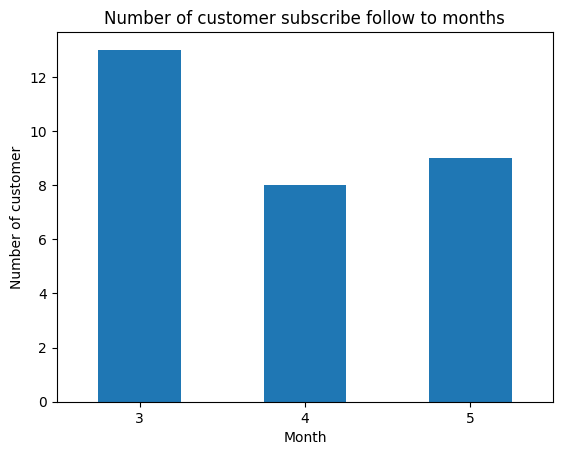

In [ ]:
# Number of customer subscribe follow to time
print(f"Number of customer subscribe follow to months:\n{Customer_data['Member Since'].dt.month.value_counts().sort_index()}\n")
Customer_data["Member Since"].dt.month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.xticks(rotation = 0)
plt.ylabel('Number of customer')
plt.title('Number of customer subscribe follow to months')
plt.show()

In [ ]:
# Number of customer subscribe follow to Subscription Plan
Customer_data["Subscription Plan"].value_counts()

Subscription Plan
Basic (Ads)         17
Premium (No Ads)    13
Name: count, dtype: int64

In [ ]:
# Number of customer subscribe follow to "Subscription Plan" and	"Subscription Rate"
Customer_data.pivot_table(index= "Subscription Plan", columns = "Subscription Rate", values = "unsubscribed", aggfunc = "count").fillna(0)

Subscription Rate,$2.99,$7.99,$9.99
Subscription Plan,,,
Basic (Ads),17.0,0.0,0.0
Premium (No Ads),0.0,7.0,6.0


In [ ]:
# Number of customer subscribe follow to Discount?
Customer_data["Discount?"].value_counts()

Discount?
No     23
Yes     7
Name: count, dtype: int64

In [ ]:
# number of customer were discounted by Subscription Plan
Customer_data.groupby("Subscription Plan")["Discount?"].value_counts().reset_index(name = "Number of customer")

,Subscription Plan,Discount?,Number of customer
0,Basic (Ads),No,17
1,Premium (No Ads),Yes,7
2,Premium (No Ads),No,6


In [ ]:
# number of customer were discounted by Subscription rate
Customer_data[Customer_data["Discount?"] == "Yes"].groupby("Subscription Rate")["Discount?"].\
value_counts().reset_index(name = "Number of customer")

,Subscription Rate,Discount?,Number of customer
0,$7.99,Yes,7


In [ ]:
# Number of customer unsubcribe
Customer_data["unsubscribed"].value_counts().reset_index()

,unsubscribed,count
0,0,17
1,1,13


In [ ]:
# Create new columns "since_before_cancelled"
Customer_data["since_before_cancelled"] = (Customer_data["Cancellation Date"] - Customer_data["Member Since"]).dt.days

In [ ]:
# Statistic for members were cancelled
Customer_data[Customer_data["unsubscribed"] == 1]["since_before_cancelled"].describe()

count    13.000000
mean     46.307692
std      23.135055
min      16.000000
25%      24.000000
50%      46.000000
75%      65.000000
max      80.000000
Name: since_before_cancelled, dtype: float64

In [ ]:
# We consider the relationship between discount and the cancellation of each customer
Cencell_by_discount = pd.crosstab(Customer_data["unsubscribed"], Customer_data["discount"])
Percentage_cancel = Cencell_by_discount.div(Cencell_by_discount.sum(0).astype(float), axis = 1) *100
Percentage_cancel

discount,0,1
unsubscribed,,
0,69.565217,14.285714
1,30.434783,85.714286


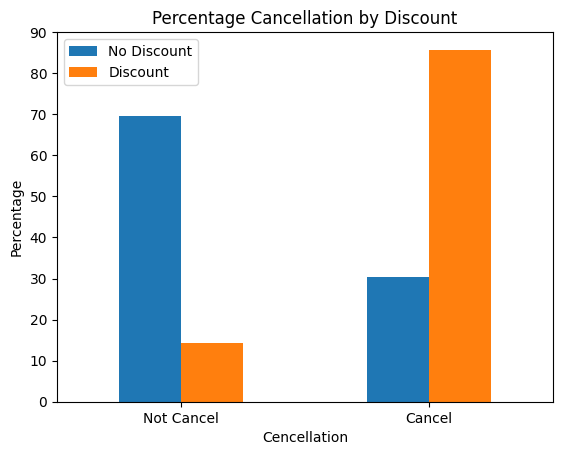

In [ ]:
# Visualization
Percentage_cancel.index = ["Not Cancel", "Cancel"]
Percentage_cancel.columns = ["No Discount", "Discount"]
Percentage_cancel.plot(kind='bar')
plt.xlabel('Cencellation')
plt.xticks(rotation = 0)
plt.ylabel('Percentage')
plt.title('Percentage Cancellation by Discount')
plt.show()

### Assessment the result:
```
1. There are a total of 30 customers who have registered with the time from March 13, 2023 to June 3, 2023. The most registered rate in March.
2. There are 17 customers who choose the Basic package for $ 2.99, accounting for more than 50%
  and 13 customers choose a Premium package, of which 7 customers buy a package of $7.99 and 6 customers buying $9.99 dollars package.
3. Nearly 25% of customers have registered Discount, in which Discount packages are mainly Premium for $ 7.99.
4. The minimum registration of registration date is 16 days and the highest is 80 days, with an average of 46 days (1.5 months)
  in the period of 3 months.
5. Within 3 months from March 13, 2023 to June 3, 2023, there were 13 customers nearly 50% of them canceled. In which,
  the rate of Discount accounts for about 85% and those who are not discount accounting for 30%
  compared to those who do not cancel the registration.

```


### Better understand the customers' listening histories:
#### ●	Join together the listening history and audio tables
#### ●	How many listening sessions did each customer have in the past 3 months?
#### ●	What were the most popular genres that customers listened to?


In [ ]:
# View the listening table
Listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [ ]:
# View the audio table
audio_file.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [ ]:
# We see the audio table has ID column not match with the Listening table.
# We conduct split the string into This column
audio_file[["Type", "Audio ID"]] = audio_file["ID"].str.split('-', expand = True)
audio_file.head()

,ID,Name,Genre,Popularity,Type,Audio ID
0,Song-101,Dance All Night,Pop,1,Song,101
1,Song-102,Unbreakable Beat,Pop,2,Song,102
2,Song-103,Sunset Boulevard,Pop Music,5,Song,103
3,Song-104,Glowing Hearts,Pop Music,10,Song,104
4,Song-105,Pop Rocks,Pop Music,52,Song,105


In [ ]:
# Check the data type of audio file after split the string
audio_file.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
Type          object
Audio ID      object
dtype: object

In [ ]:
# We have audio ID not match the data type of listening table. so change the data type
audio_file["Audio ID"] = pd.to_numeric(audio_file["Audio ID"])
audio_file.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
Type          object
Audio ID       int64
dtype: object

In [ ]:
# We will prioritize the customer's list, so we will keep all the data for the listening History table
# We Join the listening table and audio table
Combine_Listen_history = Listening_history.merge(audio_file, left_on = "Audio ID", \
                                                 right_on = "Audio ID", how = "left").drop(["ID","Type"], axis = 1)
Combine_Listen_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Name,Genre,Popularity
0,5001,100520,1,101,Song,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Sunset Boulevard,Pop Music,5
3,5001,100520,4,104,Song,Glowing Hearts,Pop Music,10
4,5001,100520,5,105,Song,Pop Rocks,Pop Music,52


In [ ]:
# The number of listening sessions that each customer had in the past 3 months
Total_session = Combine_Listen_history.groupby("Customer ID")["Session ID"].nunique().\
sort_values(ascending = False).reset_index(name = "Listening sessions")
Total_session

,Customer ID,Listening sessions
0,5001,8
1,5267,7
2,5763,6
3,6824,4
4,5338,4
5,5002,4
6,7224,4
7,7158,3
8,7087,3
9,6406,3


In [ ]:
# the most popular genres that customers listened to
Combine_Listen_history["Genre"].value_counts()

Genre
Pop Music     167
Pop           100
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

In [ ]:
# We can see the Pop and Pop Music, it look like mistake typo. So we proceed to bring it to a unique string
Combine_Listen_history["Genre"] = np.where(Combine_Listen_history["Genre"] == "Pop Music", "Pop",\
                                              Combine_Listen_history["Genre"])
Combine_Listen_history["Genre"].value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

In [ ]:
# the most Audio Type that customers listened to
Combine_Listen_history["Audio Type"].value_counts()

Audio Type
Song       463
Podcast     42
Name: count, dtype: int64

### Assessment the result:
#### 1. Almost of the genres in listening history are Pop Music.
#### 2. The highest  of listening Session by each customer is 8.
#### 3. almost of customer listen to Song instead of Podcast.

# 5. Prep for Modeling

#### Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
#### ●	Customer ID.
#### ●	Whether a customer cancelled or not.
#### ●	Whether a customer received a discount or not.


In [ ]:
# Create the new dataset with Customer_ID, Unsubscibe, discount wiht non-null and following numeric data type
Pre_model = Customer_data[["Customer ID", "unsubscribed", "discount"]]
Pre_model.head()

,Customer ID,unsubscribed,discount
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [ ]:
# Checking null and datatypes
Pre_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Customer ID   30 non-null     int64
 1   unsubscribed  30 non-null     int64
 2   discount      30 non-null     int64
dtypes: int64(3)
memory usage: 848.0 bytes


#### ●	The number of listening sessions

In [ ]:
# Join the Total_Session table with Pre_model table
Pre_model = Pre_model.merge(Total_session, on = "Customer ID", how = "left")
Pre_model.head()

,Customer ID,unsubscribed,discount,Listening sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


#### ●	Percent of listening history consisting of Pop.

In [ ]:
# Transform a categorical field of the "Genre" column into multiple numeric fields by dummy variable
Dummies_Genre = pd.get_dummies(Combine_Listen_history["Genre"], dtype = int)
Dummies_Genre.head()

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [ ]:
# Combine the table above with customer ID
Customer_Genre = pd.concat([Combine_Listen_history["Customer ID"], Dummies_Genre], axis = 1)
Customer_Genre.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0


In [ ]:
# Calculate the total Genres by customer ID
Customer_Genre = Customer_Genre.groupby("Customer ID").sum()
Customer_Genre.head()

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
Customer ID,,,,,,
5001,0,0,26,0,34,0
5002,0,22,0,0,0,0
5004,0,0,0,0,9,0
5267,0,0,22,0,23,0
5338,0,18,0,0,0,0


In [ ]:
# Calculate the percentage of each genre group by customer ID
Customer_Genre = round(Customer_Genre.div(Customer_Genre.sum(1), axis = 0) * 100, 1).reset_index()
Customer_Genre.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0.0,0.0,43.3,0.0,56.7,0.0
1,5002,0.0,100.0,0.0,0.0,0.0,0.0
2,5004,0.0,0.0,0.0,0.0,100.0,0.0
3,5267,0.0,0.0,48.9,0.0,51.1,0.0
4,5338,0.0,100.0,0.0,0.0,0.0,0.0


#### ●	Percent of listening history consisting of Podcasts

In [ ]:
# Transform a categorical field of the "Type Music" column into multiple numeric fields by dummy variable
Dummies_Type = pd.get_dummies(Combine_Listen_history["Audio Type"], dtype = int)
Dummies_Type.head()

,Podcast,Song
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# Combine the table above with customer ID
Customer_Type = pd.concat([Combine_Listen_history["Customer ID"], Dummies_Type], axis = 1)
Customer_Type.head()

,Customer ID,Podcast,Song
0,5001,0,1
1,5001,0,1
2,5001,0,1
3,5001,0,1
4,5001,0,1


In [ ]:
# Calculate the total Type of music by customer ID
Customer_Type = Customer_Type.groupby("Customer ID").sum()
Customer_Type.head()

,Podcast,Song
Customer ID,,
5001,0,60
5002,0,22
5004,0,9
5267,0,45
5338,0,18


In [ ]:
# Calculate the percentage of each Type of music group by customer ID
Customer_Type = round(Customer_Type.div(Customer_Type.sum(1), axis = 0) * 100,2).reset_index()
Customer_Type.head()

,Customer ID,Podcast,Song
0,5001,0.0,100.0
1,5002,0.0,100.0
2,5004,0.0,100.0
3,5267,0.0,100.0
4,5338,0.0,100.0


In [ ]:
# Combine the Percentage column of Pop music genre and Podcast music genre into the Pre_model table
Pre_model_new =  Pre_model.merge(Customer_Genre[["Customer ID", "Pop"]], on = "Customer ID", how = "left")
Pre_model_final = Pre_model_new.merge(Customer_Type[["Customer ID", "Podcast"]], on = "Customer ID", how = "left")
Pre_model_final.head()

,Customer ID,unsubscribed,discount,Listening sessions,Pop,Podcast
0,5001,0,0,8,56.7,0.0
1,5002,0,0,4,0.0,0.0
2,5004,1,0,1,100.0,0.0
3,5267,0,0,7,51.1,0.0
4,5338,0,0,4,0.0,0.0


### Visualize the relationships in the modeling DataFrame using a pair plot:
#### ●	What are some of your observations?
#### ●	What variables might do a good job predicting customer cancellation?


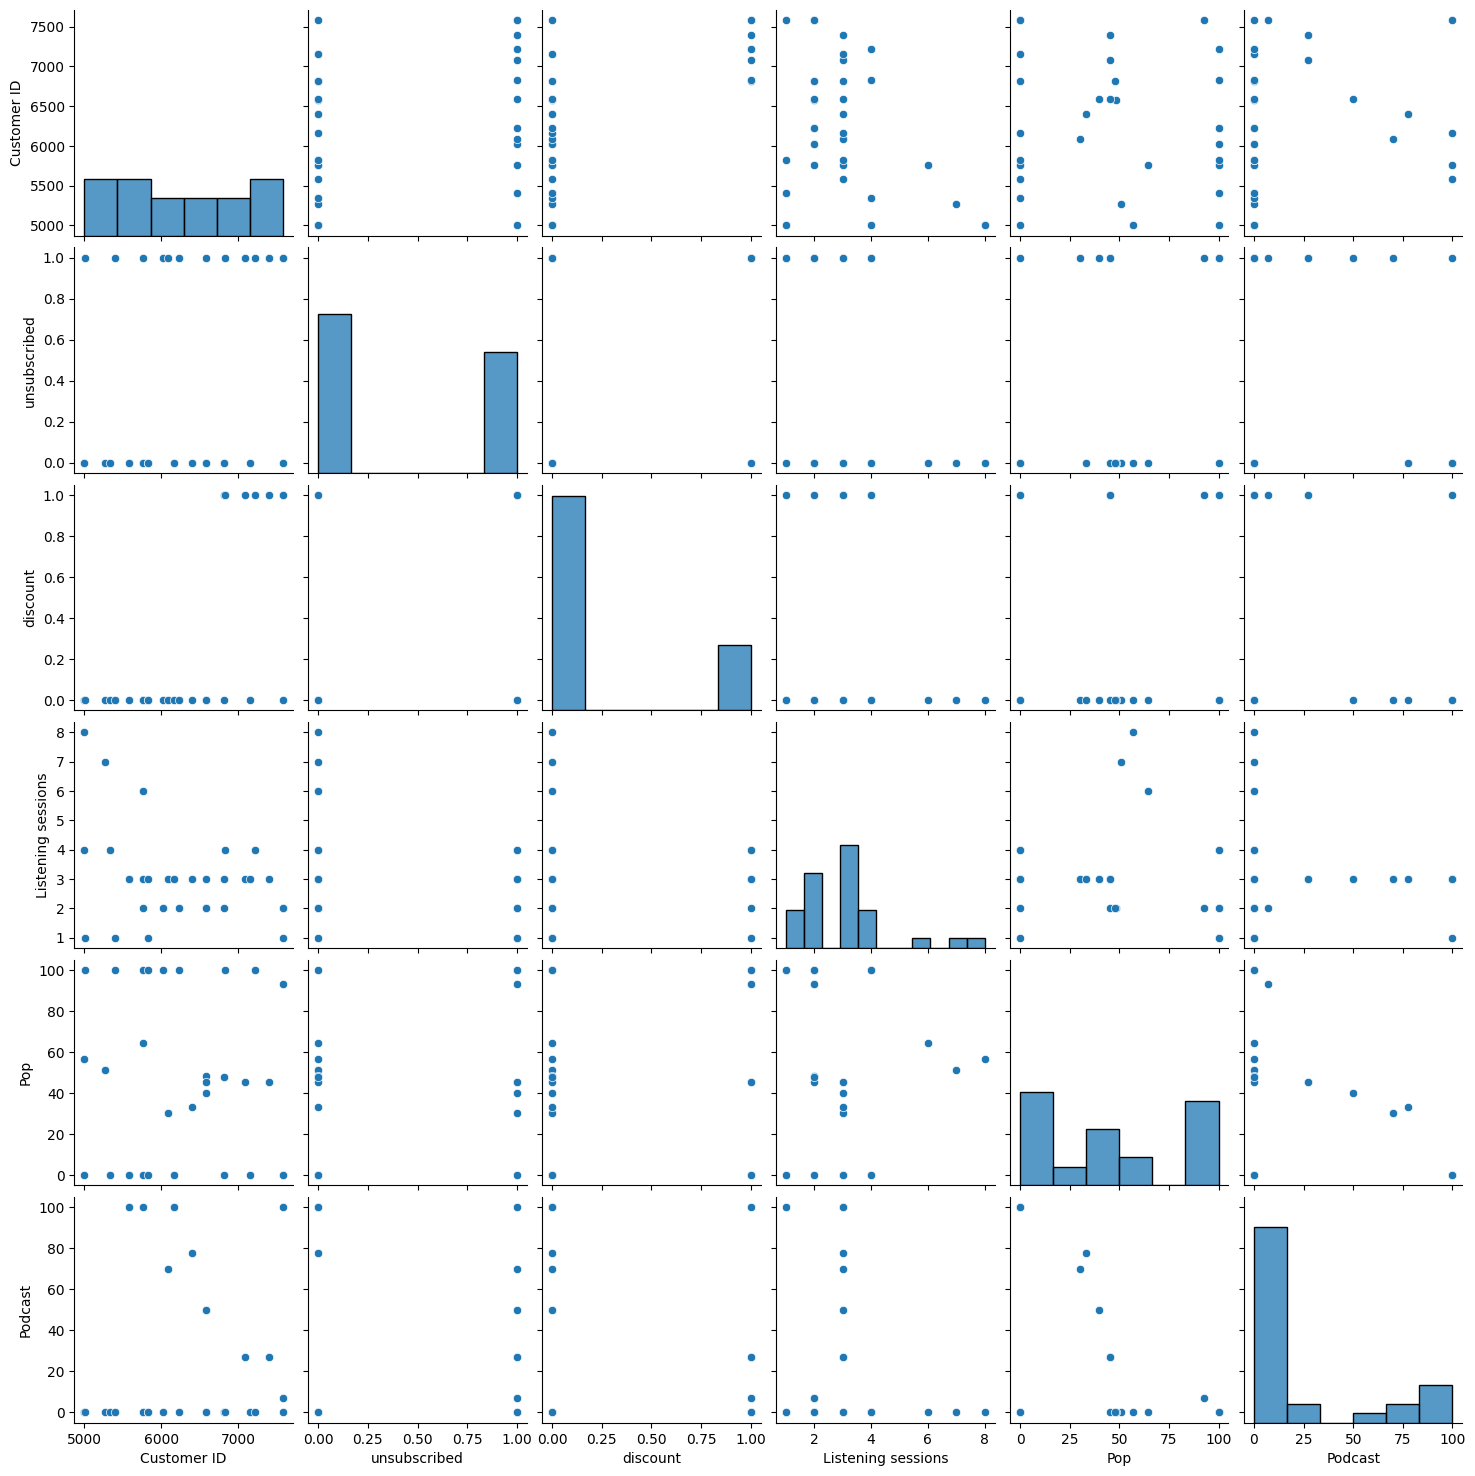

In [ ]:
# create the pair plot
sns.pairplot(Pre_model_final)
plt.show()

In [ ]:
# See the correlation
Pre_model_final.corr()

,Customer ID,unsubscribed,discount,Listening sessions,Pop,Podcast
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.076015,0.082874
unsubscribed,0.269942,1.000000,0.471825,-0.333739,0.585767,-0.007481
discount,0.648514,0.471825,1.000000,-0.048877,0.112895,0.016745
Listening sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.131122,-0.116556
Pop,-0.076015,0.585767,0.112895,-0.131122,1.000000,-0.477230
Podcast,0.082874,-0.007481,0.016745,-0.116556,-0.477230,1.000000


# Observation:
#### 1. Discounts impact Cancellations with more discounts, more cancellations.
#### 2. Number of sessions does not affect Cancellation.
#### 3. Pop Music affects Unsubscribes as more customers who listen to Pop Music will be able to unsubscribe.
#### 4. Podcast listening does not affect Cancellation.
#### --> There are two variables "Pop" and "Discount" that can predict customer cancellations well